In [1]:
######################
#Author: Vishal Arvin
#Date: 09/29/2023
######################

In [2]:
import numpy as np
import itertools
import random
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt



alpha = 10**(-5)    #learning rate
lmbda = [10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4)]

def BeetaGenerator(l_Limit,u_Limit):   
    B_List = []
    while len(B_List) < 9:
        random_value = random.uniform(l_Limit,u_Limit)
        
        if random_value not in B_List:
            B_List.append(random_value)
            
    return B_List

def DummyVariableAppender(length_matrix,matrix):
    for i in range (0,length_matrix):
        if (matrix[i][6] == "Female"):
            matrix[i][6] = '0'
        elif (matrix[i][6] == "Male"):
            matrix[i][6] = '1'

        if (matrix[i][7] == "Yes"):
            matrix[i][7] = '1'
        elif (matrix[i][7] == "No"):
            matrix[i][7] = '0'

        if (matrix[i][8] == "Yes"):
            matrix[i][8] = '1'
        elif (matrix[i][8] == "No"):
            matrix[i][8] = '0'
            
def CenteringAndStandardizing(D_matrix,y_Matrix):
    D_mean = np.mean(D_matrix, axis = 0)
    Y_mean = np.mean(y_Matrix, axis = 0)

    
    D_matrix = D_matrix - np.array(D_mean, dtype=float)
    y_Matrix = y_Matrix - Y_mean
    
    
    D_std = np.std(D_matrix, axis = 0)
    D_matrix = np.divide(D_matrix, np.array(D_std, dtype=float))
        
    return [D_matrix,y_Matrix]

def akCalculator(matrix,responsematrix,beetavalue,index):
    indexColumn = matrix[:,index]
    indexColumn = np.transpose(indexColumn)
    y_xbeeta = responsematrix - np.dot(matrix,beetavalue)
    xbeeta = np.multiply(indexColumn,beetavalue[index])
    y_xbeetaplusxbeeta = y_xbeeta + xbeeta
    a_k = np.dot(indexColumn,y_xbeetaplusxbeeta)
    return a_k

def bkcalculator(ak,lmbda,alpha,bk):
    aksign = np.sign(ak)
    ak = abs(ak)
    value1 = ak - ((lmbda*(1-alpha))/2)
    if value1<0:
        bkmul = 0
    else:
        bkmul = value1
    beeta = (aksign*(bkmul))/(bk + (lmbda*alpha))
    return beeta

def CVCalculator(batches,lmbdaa,matrix,response,Originalbeeta):    
    MSElist = []
    for z in range (len(batches)):
        validationset = []
        validationsetResponse = []
        trainingset = []
        trainingsetResponse = []
        beeta = Originalbeeta
        print("this is the original beeta ",beeta)
        
        for i in batches[z][0]:
            validationset.append(matrix[i])
            validationsetResponse.append(response[i])
            
        for j in batches[z][1]:
            trainingset.append(matrix[j])
            trainingsetResponse.append(response[j])
    
    
        validationset = np.array(validationset)
        validationsetResponse = np.array(validationsetResponse)

        trainingset = np.array(trainingset)
        trainingsetResponse = np.array(trainingsetResponse)
        
        trainingsetmean = np.mean(trainingset,axis = 0)
        trainingresponsemean = np.mean(trainingsetResponse,axis = 0)
        trainingsetstd = np.std(trainingset,axis = 0)
    
        trainingset = np.divide((trainingset - trainingsetmean),trainingsetstd)
        trainingsetResponse = trainingsetResponse - trainingresponsemean
        
        validationset = np.divide((validationset - trainingsetmean),trainingsetstd)
        validationsetResponse = validationsetResponse - trainingresponsemean
    
    
        modelResponse = []


        for s in range (1000):
            beeta = beeta - np.multiply(2*alpha,((np.dot(lmbdaa,beeta)) - np.dot(trainingset.transpose(),(trainingsetResponse - (np.dot(trainingset,beeta))))))
        print(beeta)
        
        for i in range (len(validationset)):
            mainResponse = beeta[0]*validationset[i][0] + beeta[1]*validationset[i][1] + beeta[2]*validationset[i][2] + beeta[3]*validationset[i][3] + beeta[4]*validationset[i][4] + beeta[5]*validationset[i][5] + beeta[6]*validationset[i][6] + beeta[7]*validationset[i][7]+ beeta[8]*validationset[i][8]
            modelResponse.append(mainResponse)

        MSE = np.multiply(1/len(validationset),np.dot((validationsetResponse-modelResponse).transpose(),(validationsetResponse-modelResponse)))
        
        
        MSElist.append(MSE)
     
    cvsum = 0
    for values in MSElist:
        cvsum = cvsum + values
      
    CV = cvsum/5
    
    return CV
        



D_matrix = np.loadtxt("Credit_N400_p9.csv",skiprows=1,usecols=[0,1,2,3,4,5,6,7,8],delimiter=',',dtype=object) 
y_Matrix = np.loadtxt("Credit_N400_p9.csv",skiprows=1,usecols=[9],delimiter=',',dtype=object)

DummyVariableAppender(len(D_matrix),D_matrix)
        
beeta = BeetaGenerator(-1,1)
beeta.sort()

D_matrix = np.array(D_matrix, dtype=float)
y_Matrix = np.array(y_Matrix, dtype = float)

D_matrix1 = np.array(D_matrix, dtype=float)
y_Matrix1 = np.array(y_Matrix, dtype = float)


D_matrix,y_Matrix = CenteringAndStandardizing(D_matrix,y_Matrix)







In [3]:
#print("the original beeta values: ",beeta)
store_Beeta = []
for values in lmbda:
    for i in range (10**5):
        #𝛽 ≔ 𝛽 − 2𝛼[𝜆𝛽 − 𝐗𝑇(𝐲 − 𝐗𝛽)]
        beeta = beeta - np.multiply(2*alpha,((np.dot(values,beeta)) - np.dot(D_matrix.transpose(),(y_Matrix - (np.dot(D_matrix,beeta))))))
    store_Beeta.append(beeta)
    print(beeta)
    
store_Beeta = np.array(store_Beeta)

[-274.65351442  419.59306297  195.90020556   23.44594236  -10.96503467
   -3.34702325    5.20097605  127.78324771   -3.59543799]
[-274.30811698  428.9590444   186.17544001   23.8704502   -10.97779163
   -3.39205687    5.19009425  127.80269842   -3.5342849 ]
[-271.22804381  370.93315588  241.19303758   21.55298599  -11.26919791
   -3.05259814    5.09399173  127.08674364   -3.96583581]
[-242.10833392  302.25028742  280.52528945   20.27479689  -13.32129241
   -2.36122776    4.18577233  123.16827701   -4.71110792]
[-94.63942667 211.36544753 209.54614847  22.36496179 -19.17568799
  -0.4618808   -0.21941357  97.66702868  -5.73202868]
[22.93310136 84.07770503 84.21703606 10.26564982 -5.6931724  -0.09971875
 -1.99329983 34.00237516 -1.95907508]
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]


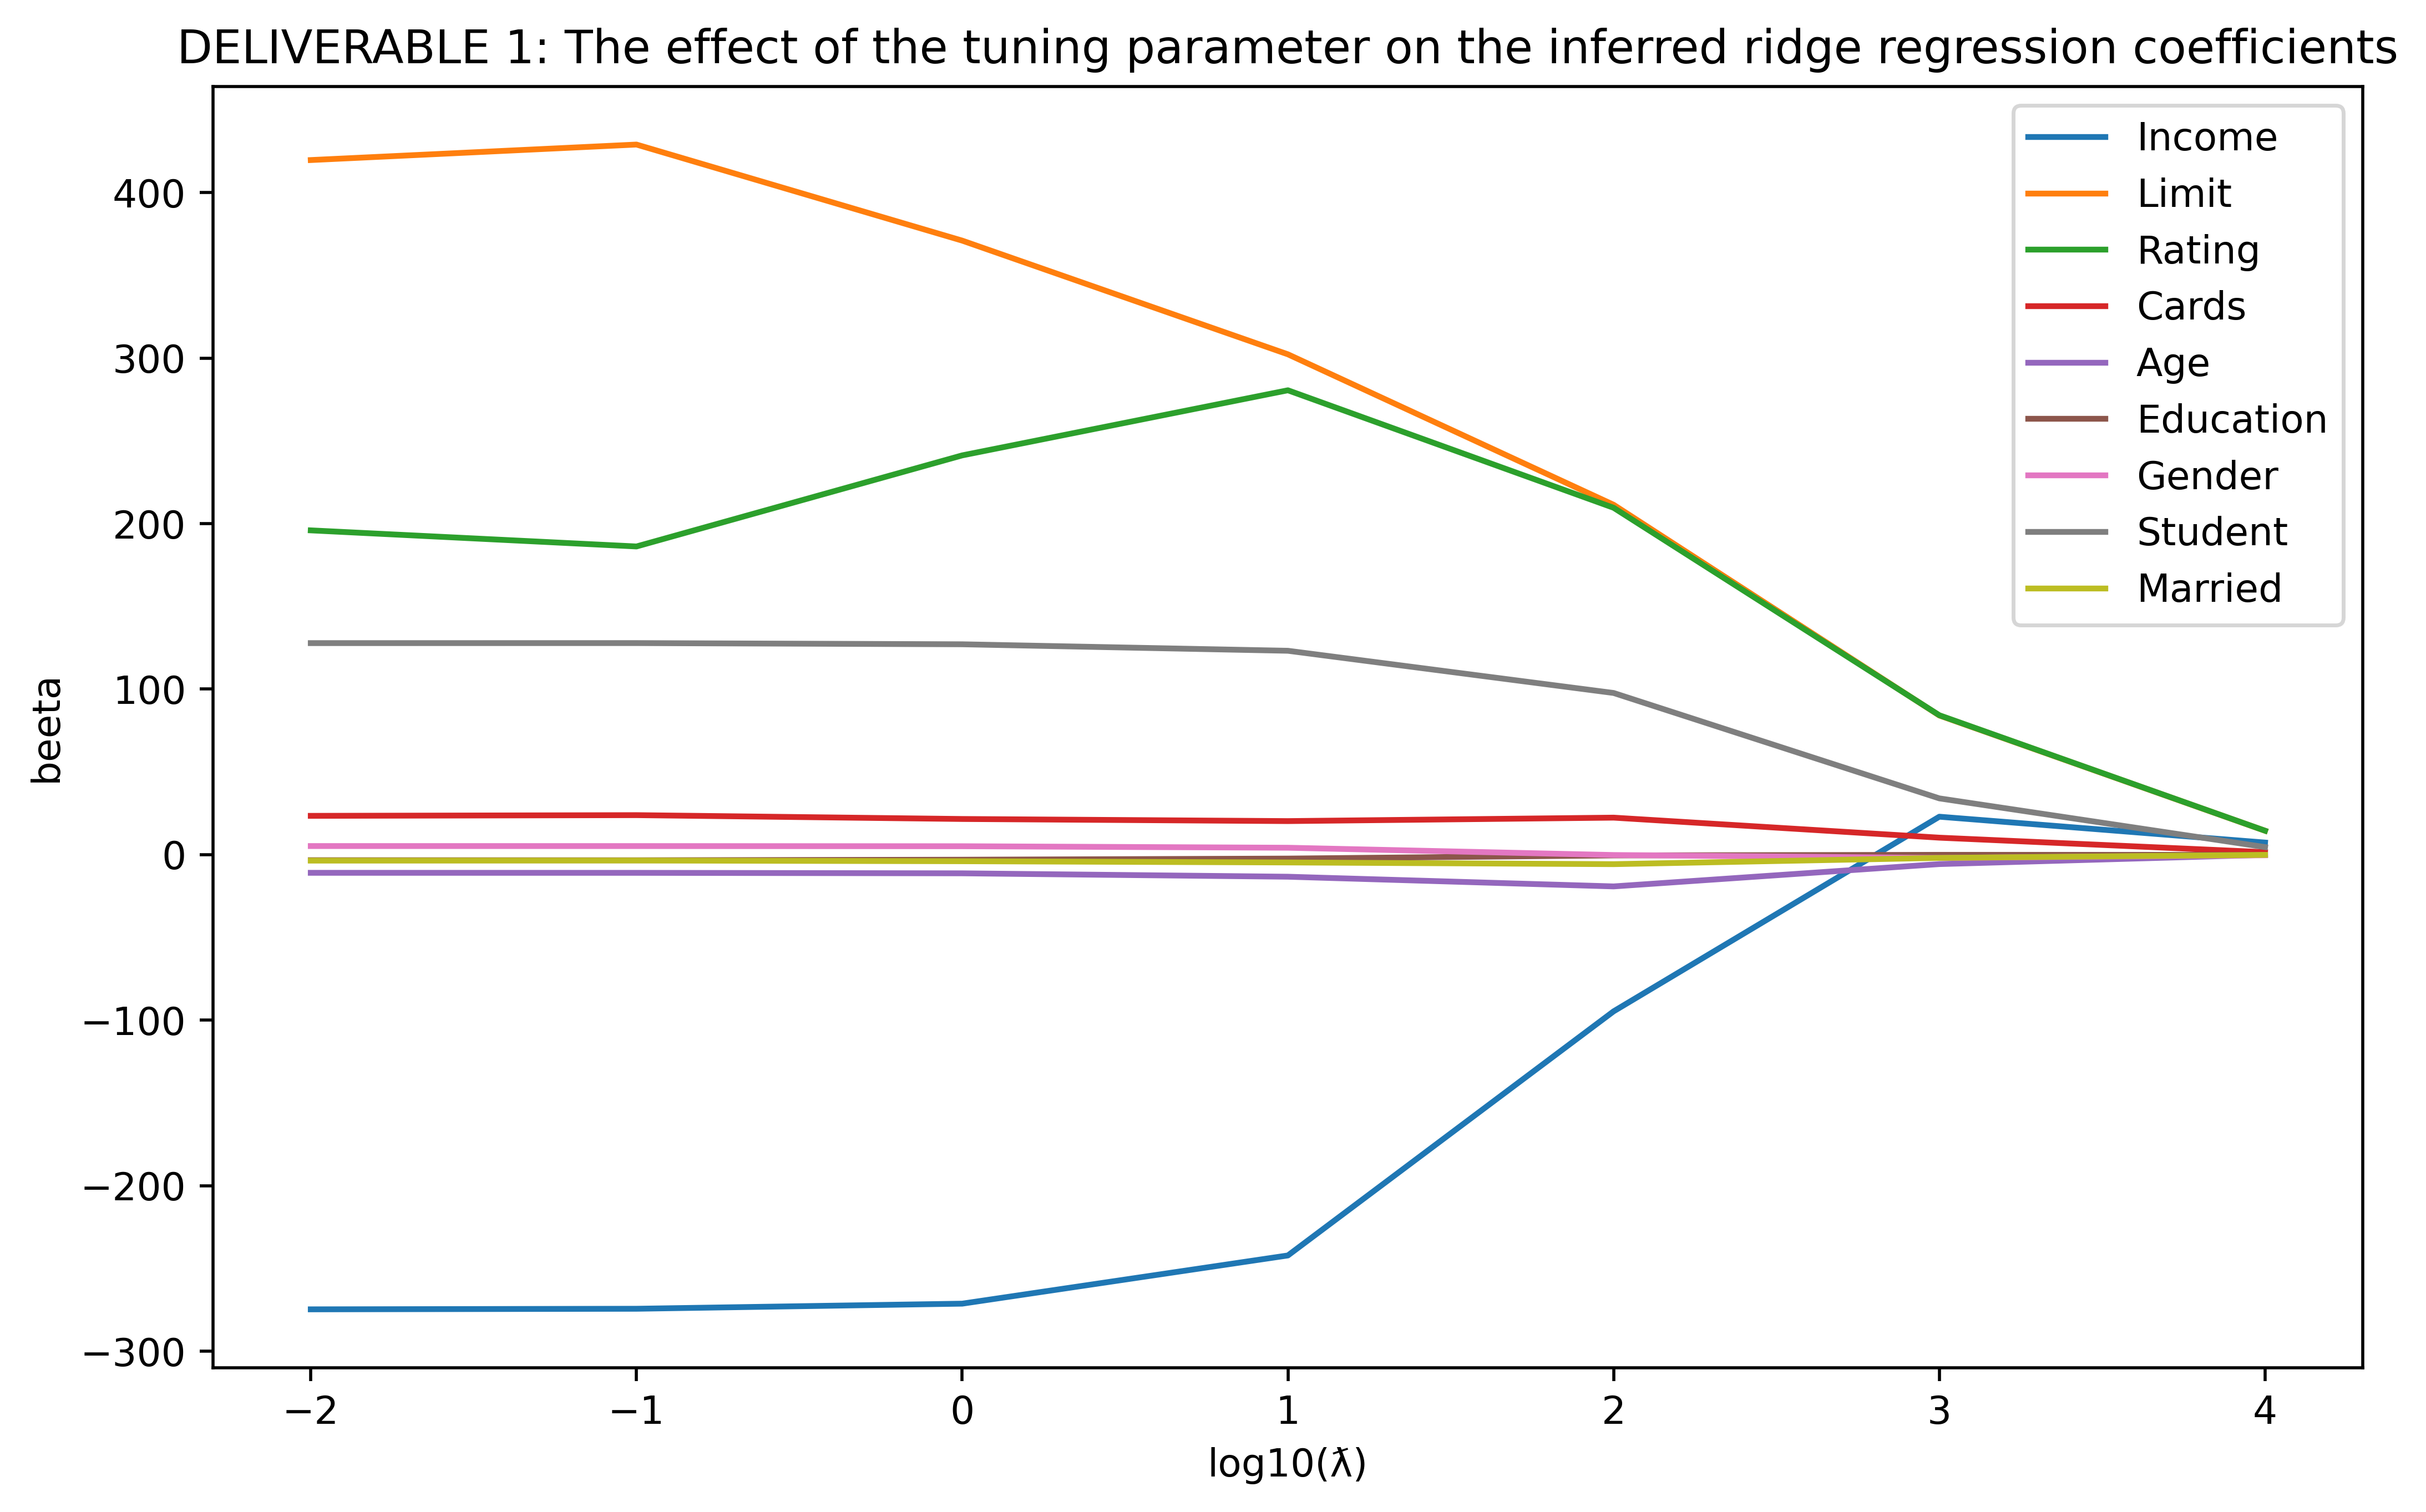

In [4]:
p_list = ['Income','Limit','Rating','Cards','Age','Education','Gender','Student','Married']
y = np.log10(lmbda)
x = np.arange(-1,1)

beta_0 = store_Beeta[:,0]  # Placeholder for beta_0 values
beta_1 = store_Beeta[:,1]  # Placeholder for beta_1 values
beta_2 = store_Beeta[:,2]  # Placeholder for beta_2 values
beta_3 = store_Beeta[:,3]  # Placeholder for beta_3 values
beta_4 = store_Beeta[:,4]  # Placeholder for beta_4 values
beta_5 = store_Beeta[:,5]  # Placeholder for beta_5 values
beta_6 = store_Beeta[:,6]  # Placeholder for beta_6 values
beta_7 = store_Beeta[:,7]  # Placeholder for beta_7 values
beta_8 = store_Beeta[:,8]  # Placeholder for beta_8 values

plt.figure(figsize=(10,6),dpi=500)

plt.plot(y,beta_0,label = p_list[0])
plt.plot(y,beta_1,label = p_list[1])
plt.plot(y,beta_2,label = p_list[2])
plt.plot(y,beta_3,label = p_list[3])
plt.plot(y,beta_4,label = p_list[4])
plt.plot(y,beta_5,label = p_list[5])
plt.plot(y,beta_6,label = p_list[6])
plt.plot(y,beta_7,label = p_list[7])
plt.plot(y,beta_8,label = p_list[8])

plt.xlabel("log10(ƛ)") 
plt.ylabel("beeta")
plt.title('DELIVERABLE 1: The effect of the tuning parameter on the inferred ridge regression coefficients')
plt.legend()

# Show the plot
plt.show()

In [5]:
indices = list(itertools.chain(range(0,len(D_matrix))))
random.shuffle(indices)

In [6]:



N= len(D_matrix1)

b1 = indices[0:int((N/5))]
b2 = indices[int(N/5):int(((2*N)/5))]
b3 = indices[int((2*N)/5):int(((3*N)/5))]
b4 = indices[int((3*N)/5):int(((4*N)/5))]
b5 = indices[int((4*N)/5):int(((5*N)/5))]


batch1 = [b1,b2+b3+b4+b5]
batch2 = [b2,b1+b3+b4+b5]
batch3 = [b3,b2+b1+b4+b5]
batch4 = [b4,b2+b3+b1+b5]
batch5 = [b5,b2+b3+b4+b1]

batches = [batch1,batch2,batch3,batch4,batch5]


beeta_1 = BeetaGenerator(-1,1)
beeta_1.sort()




cvvaluelist = []

for values in lmbda:
    cvvalue = CVCalculator(batches,values,D_matrix1,y_Matrix1,beeta_1)
    cvvaluelist.append(cvvalue)
    


this is the original beeta  [-0.9513679767058516, -0.9152461163597994, -0.6536649436633539, -0.5226409835855521, -0.2852756333043689, -0.25970550333274267, 0.10808678489830559, 0.1333778687528746, 0.26778075968226944]
[-199.78882846  279.52632602  275.77366418   26.19998161  -15.54598095
   -2.33302314   -1.8297929   128.72937853   -8.98050978]
this is the original beeta  [-0.9513679767058516, -0.9152461163597994, -0.6536649436633539, -0.5226409835855521, -0.2852756333043689, -0.25970550333274267, 0.10808678489830559, 0.1333778687528746, 0.26778075968226944]
[-200.07188542  273.80994737  271.26142941   23.32311909  -16.67053177
   -1.48695092    6.63092323  122.961064     -6.95195833]
this is the original beeta  [-0.9513679767058516, -0.9152461163597994, -0.6536649436633539, -0.5226409835855521, -0.2852756333043689, -0.25970550333274267, 0.10808678489830559, 0.1333778687528746, 0.26778075968226944]
[-200.96046031  276.24217861  271.99952695   25.40458468  -19.74234515
   -0.78298324   

[ 5.796193   11.60042894 11.60080019  1.82222749  0.04907607 -0.05168972
 -0.24926163  3.21522485 -0.21949253]


[12203.381828389478, 12214.97666393683, 12332.439181500942, 13640.45599133564, 30587.804021597876, 106526.77131807557, 191022.75736745264]


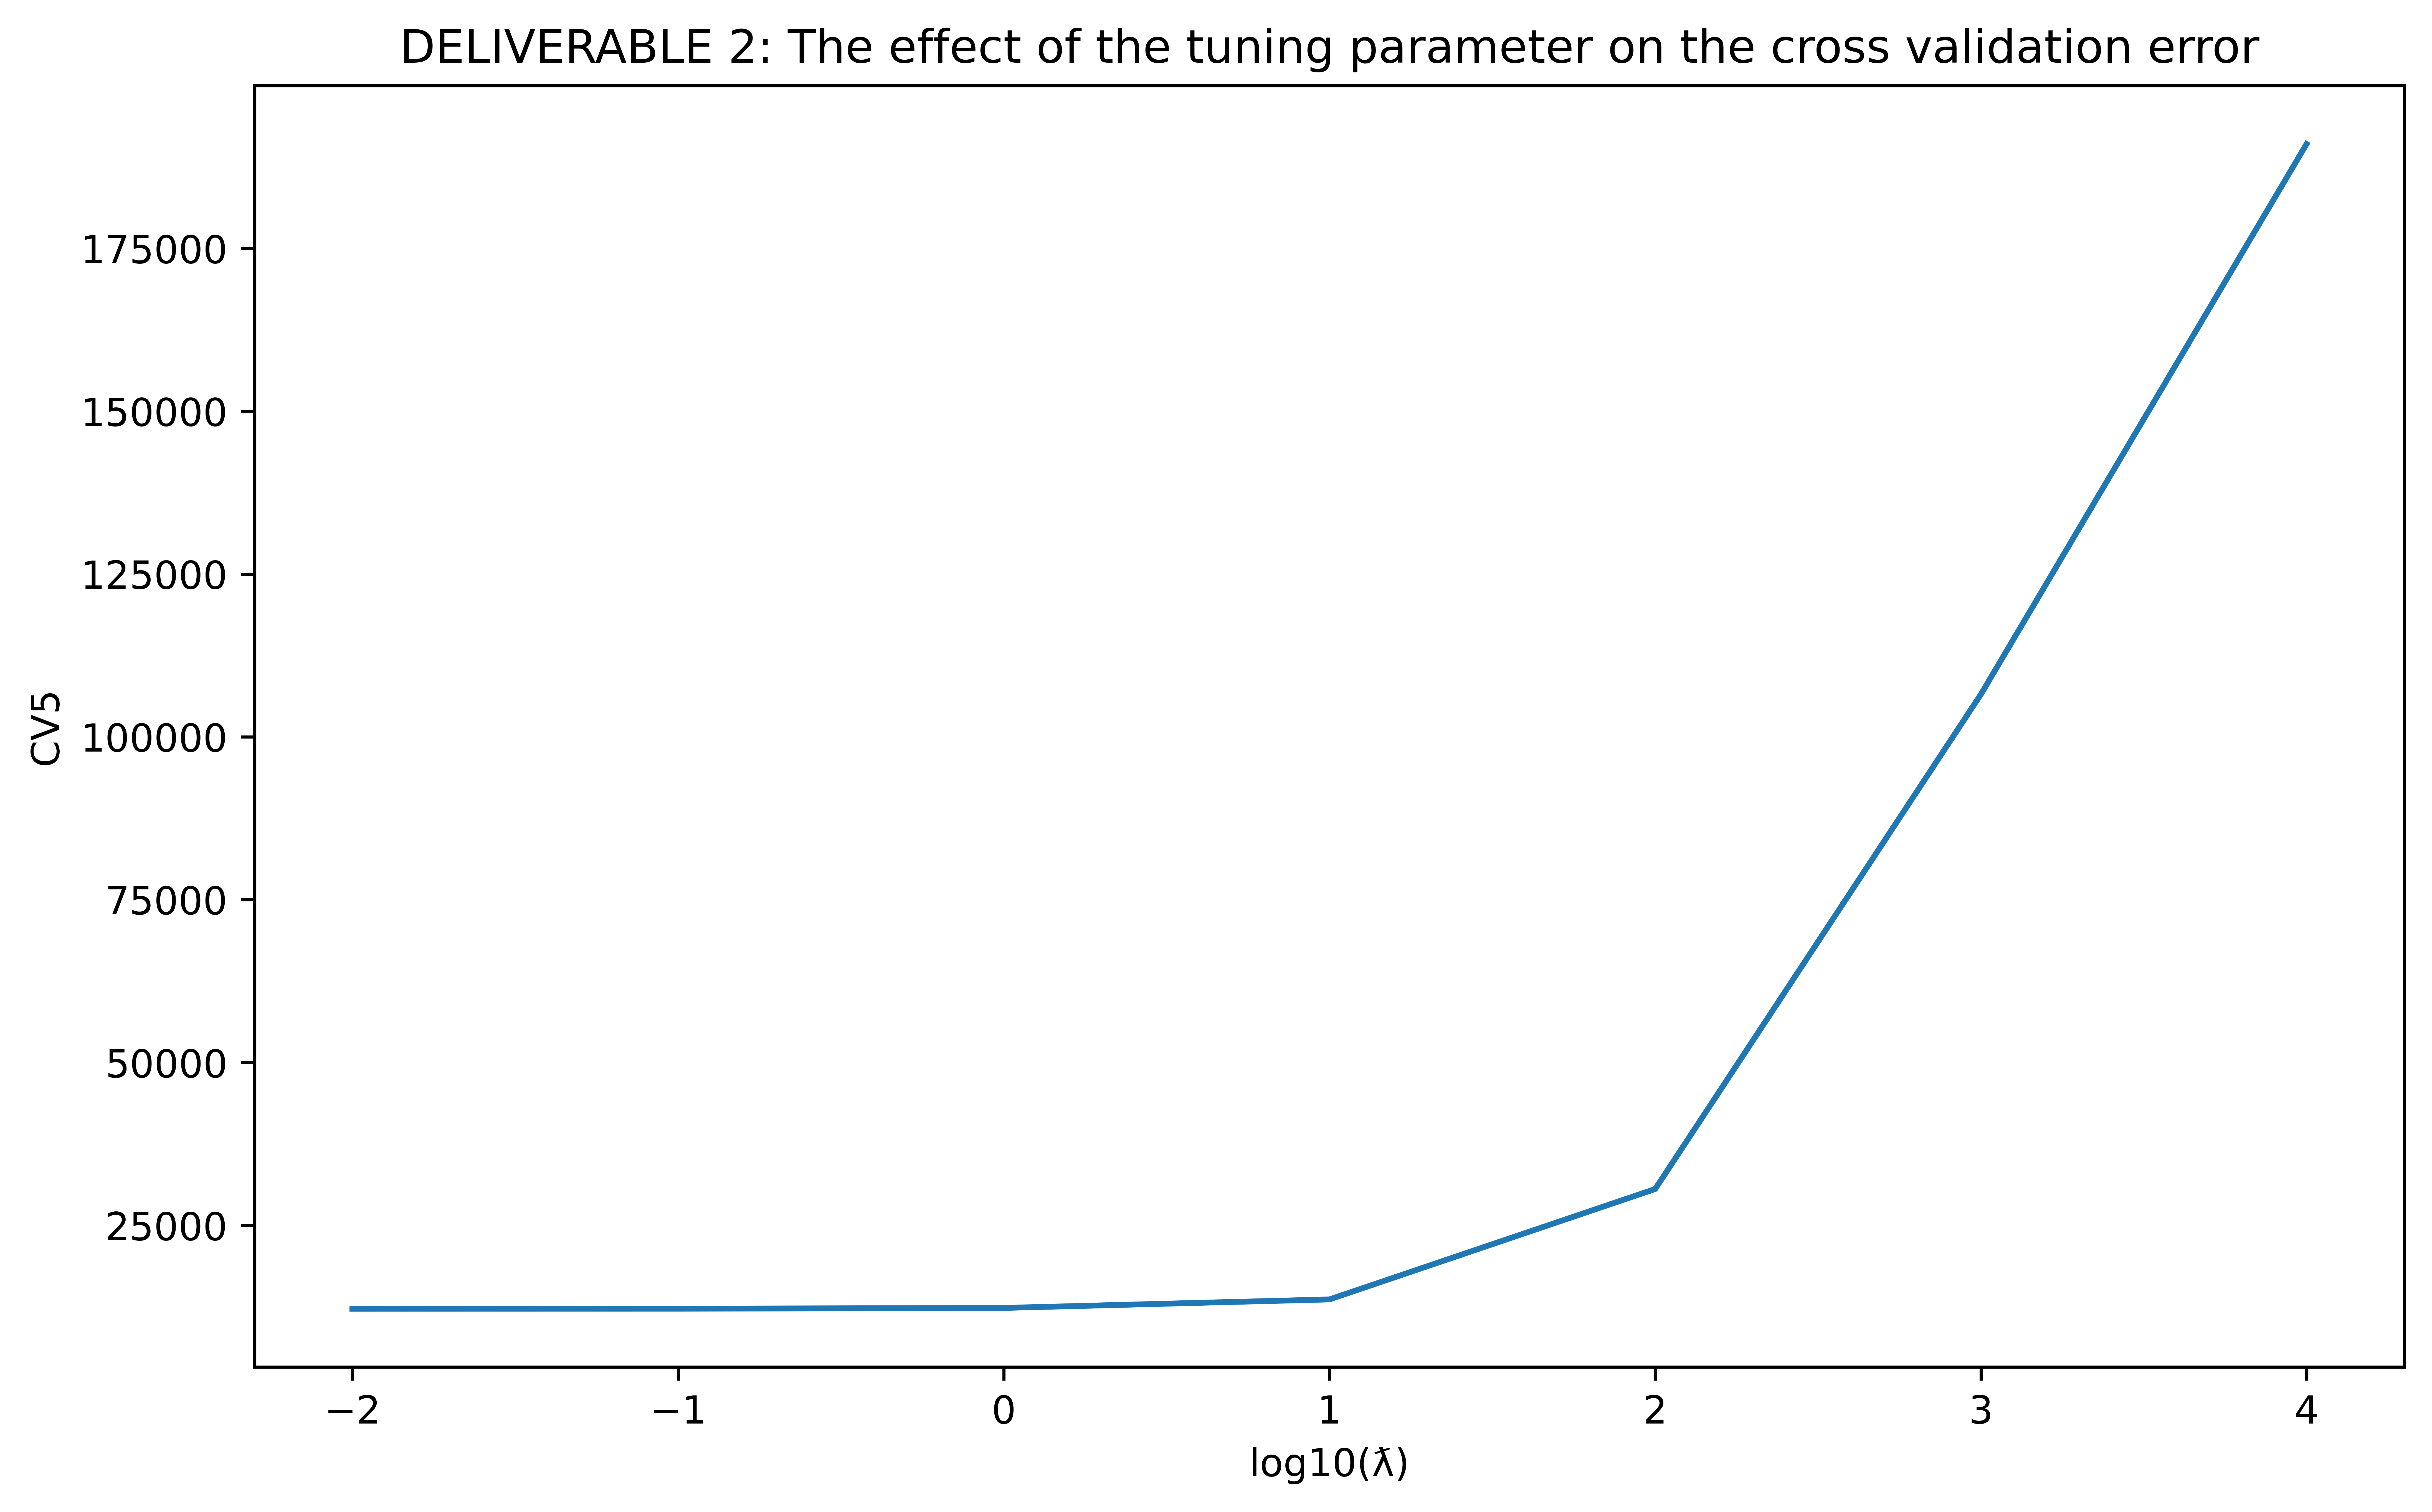

In [7]:

print(cvvaluelist)
x = np.log10(lmbda)
y = cvvaluelist

plt.figure(figsize=(10,6),dpi=1000)
plt.plot(x,y,label = "CV5")

plt.xlabel("log10(ƛ)")  

plt.ylabel("CV5")

plt.title('DELIVERABLE 2: The effect of the tuning parameter on the cross validation error')

# Show the plot
plt.show()


In [8]:
lambdastr = ["10^(-2)","10^(-1)","10^(0)","10^(1)","10^(2)","10^(3)","10^(4)"]
minTuning = cvvaluelist.index(min(cvvaluelist))
print("DELIVERABLE 3: ƛ that generated the smallest CV5 : ",lambdastr[minTuning])

DELIVERABLE 3: ƛ that generated the smallest CV5 :  10^(-2)


In [9]:
print("DELIVERABLE 4: best-fit model parameters\n")

for v in range(len(store_Beeta[minTuning])):
    print(p_list[v], ": ",store_Beeta[minTuning][v])


DELIVERABLE 4: best-fit model parameters

Income :  -274.65351441752074
Limit :  419.593062973891
Rating :  195.90020555645748
Cards :  23.44594235786177
Age :  -10.965034665135041
Education :  -3.3470232485702964
Gender :  5.20097604685673
Student :  127.78324771396531
Married :  -3.5954379939414474


In [10]:
print(cvvaluelist)

[12203.381828389478, 12214.97666393683, 12332.439181500942, 13640.45599133564, 30587.804021597876, 106526.77131807557, 191022.75736745264]
